# Grey Level Slicing

# Task 1

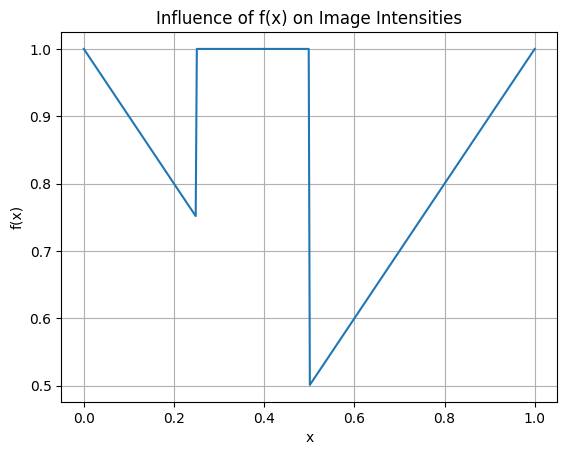

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    if 0 <= x < 0.25:
        return 1 - x
    elif 0.25 <= x <= 0.5:
        return 1
    elif x > 0.5:
        return x

x_values = np.linspace(0, 1, 400)
y_values = [f(x) for x in x_values]

plt.plot(x_values, y_values)
plt.title("Influence of f(x) on Image Intensities")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

# Task 2 

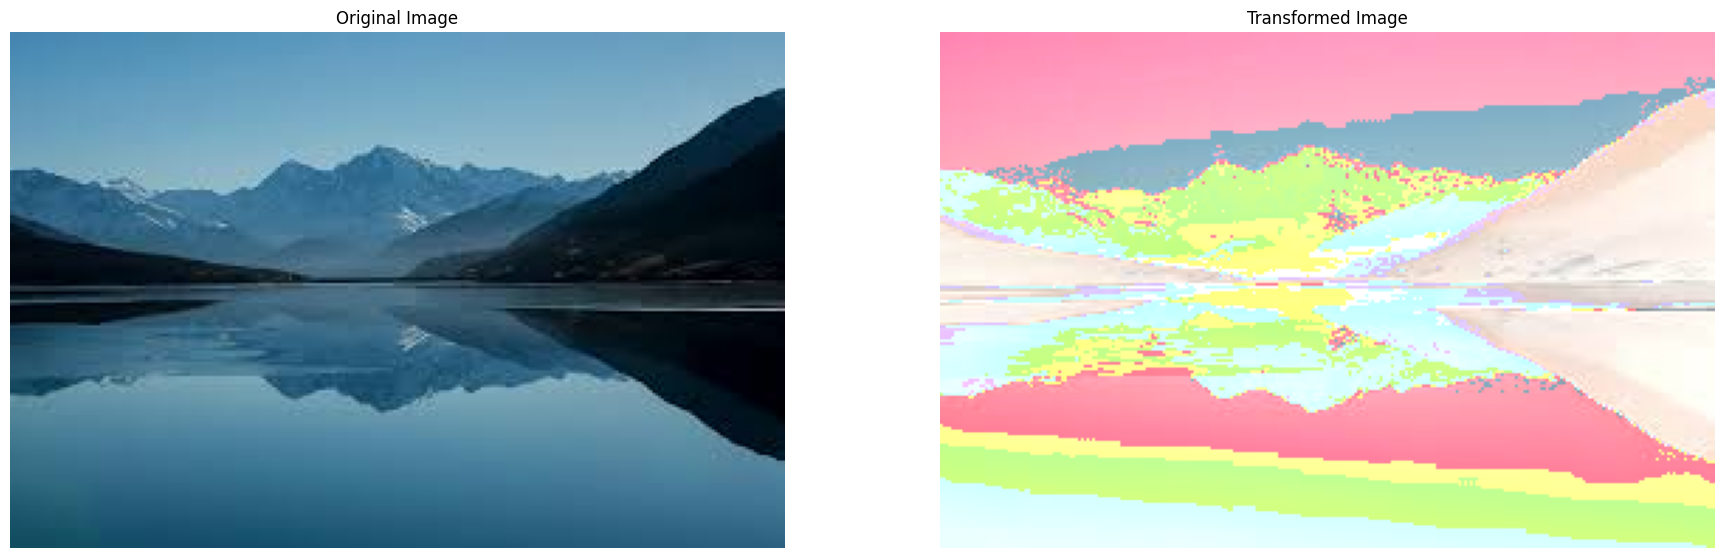

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    if 0 <= x < 0.25:
        return 1 - x
    elif 0.25 <= x <= 0.5:
        return 1
    elif x > 0.5:
        return x 

def apply_f_to_image(image):
    normalized_img = image / 255
    vectorized_f = np.vectorize(f)
    transformed_image = vectorized_f(normalized_img)
    transformed_image = np.uint8(transformed_image * 255)
    return transformed_image

def display(original, transformed):
    fig, axes = plt.subplots(1, 2, figsize=(22, 8))
    axes[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(cv2.cvtColor(transformed, cv2.COLOR_BGR2RGB))
    axes[1].set_title('Transformed Image')
    axes[1].axis('off')
    plt.show()
    
image = cv2.imread('Images/img.png')


transformed_image = apply_f_to_image(image)
display(image, transformed_image)

# Exercise 2

# Using cv2.qualizeHIst

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('Images/img.png')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.equalizeHist(image_gray)


array([[160, 160, 160, ..., 208, 208, 208],
       [160, 160, 161, ..., 208, 208, 208],
       [161, 161, 161, ..., 209, 209, 209],
       ...,
       [ 52,  52,  52, ...,  97,  97,  97],
       [ 52,  52,  52, ...,  91,  91,  91],
       [ 52,  52,  52, ...,  89,  89,  89]], dtype=uint8)

# Without using cv2.equaliseHist

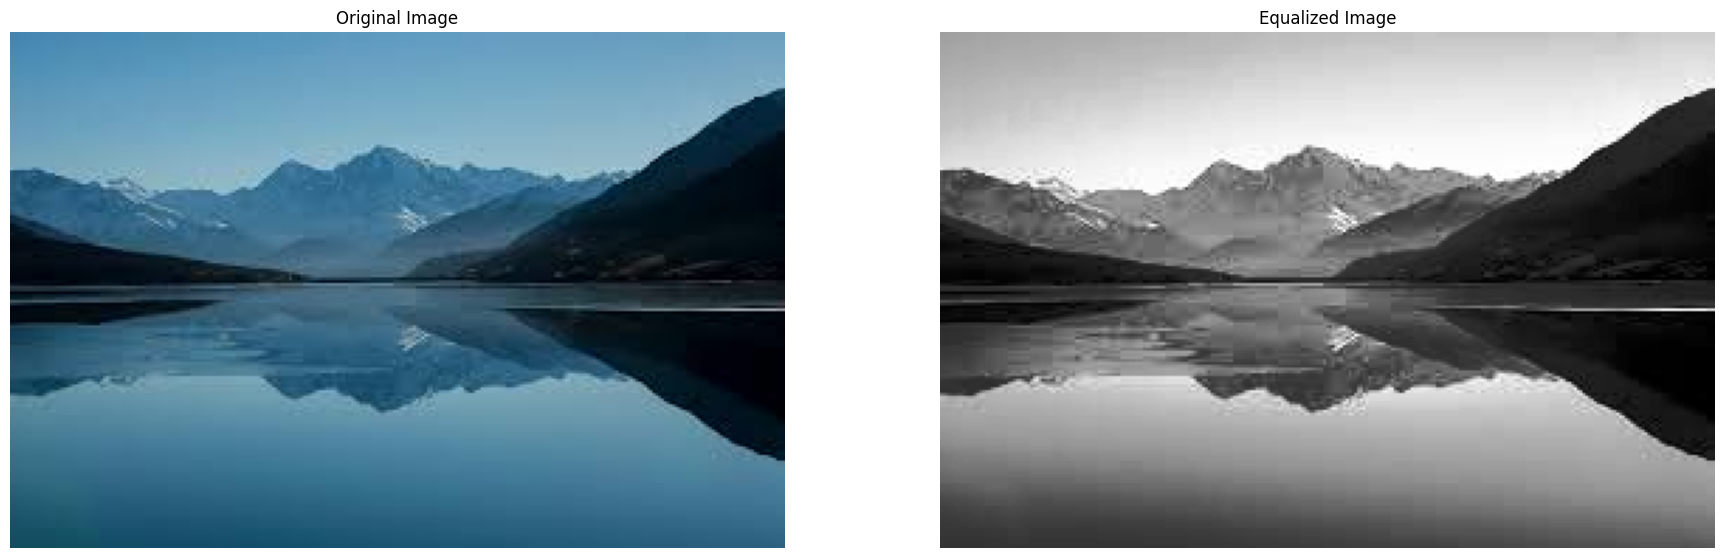

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def myHIST_equ(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    equalized_image = cdf[image]
    return equalized_image

def display(original, equalized):
    fig, axes = plt.subplots(1, 2, figsize=(22, 8))
    axes[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(equalized, cmap='gray')
    axes[1].set_title('Equalized Image')
    axes[1].axis('off')
    plt.show()

image = cv2.imread('Images/img.png')
equalized_image = myHIST_equ(image)
display(image, equalized_image)

# Contrast Stretching

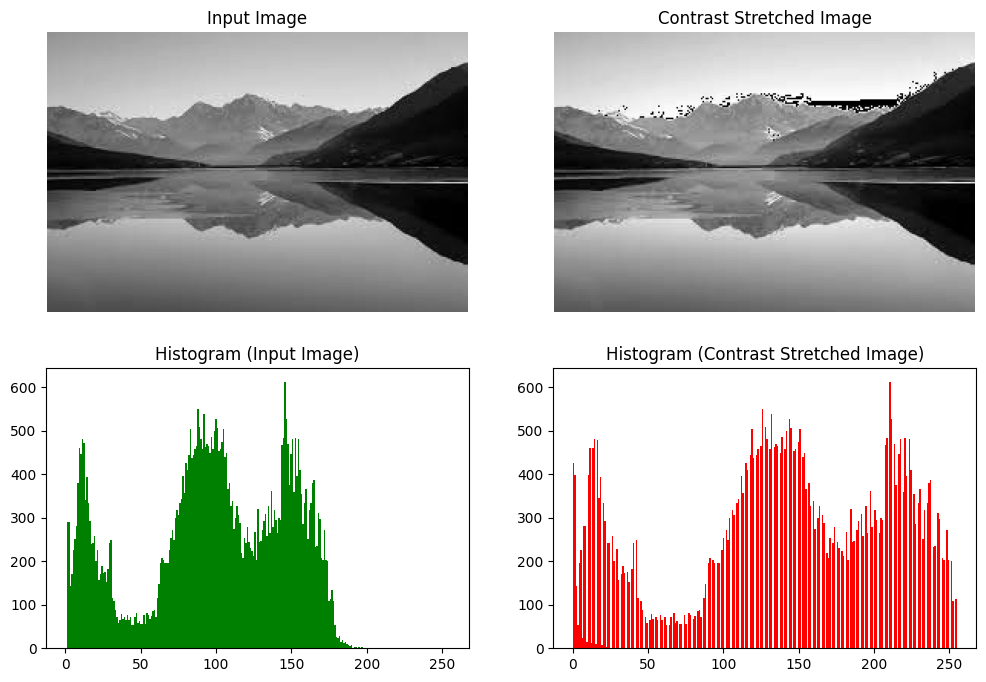

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contrastStretch(image):
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    min_value = np.percentile(image, 0)
    max_value = np.percentile(image, 99)
    
    stretched_image = ((image - min_value) / (max_value - min_value) * 255).astype(np.uint8)
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))  
    axes[0, 0].imshow(image, cmap='gray')    
    axes[0, 0].set_title('Input Image')
    axes[0, 0].axis('off')
    
    axes[0, 1].imshow(stretched_image, cmap='gray')
    axes[0, 1].set_title('Contrast Stretched Image')
    axes[0, 1].axis('off')

    axes[1, 0].hist(image.flatten(), 256, [0, 255], color='g')
    axes[1, 0].set_title('Histogram (Input Image)')
    
    axes[1, 1].hist(stretched_image.flatten(), 256, [0, 255], color='r')
    axes[1, 1].set_title('Histogram (Contrast Stretched Image)')

    plt.show()
    
image = cv2.imread('Images/img.png')

contrastStretch(image)

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
def myhist_equ(image):
        if len(image.shape) == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    r, c = image.shape
    h = np.zeros(256, dtype=int)
    # Calculate histogram
    for i in range(r):
    for j in range(c):
    h[image[i, j]] += 1
# Calculate cumulative histogram
    cum_h = np.zeros(256, dtype=float)
    cum_h[0] = h[0]
    for k in range(1, 256):
    cum_h[k] = cum_h[k - 1] + h[k]
# Normalize the cumulative histogram
    cum_h = np.floor((cum_h / (r * c)) * 255).astype(np.uint8)
    out_image = np.zeros_like(image)
    for i in range(r):
    for j in range(c):
        out_image[i, j] = cum_h[image[i, j]]